## L2: Cracking the Code: An Inside Look at Netflix's Content Strategy
#### Submission - Arnav Labhasetwar

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

In [ ]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [ ]:
netflix_df = pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
# 1. Handle missing values in 'director' and 'cast'
# Since these are text fields and many are missing, we'll fill them with 'Unknown'.
netflix_df['director'] = netflix_df['director'].fillna('Unknown')
netflix_df['cast'] = netflix_df['cast'].fillna('Unknown')

In [ ]:
# 2. Handle missing 'country'
# We'll fill with the mode, which is the most common country.
mode_country = netflix_df['country'].mode()[0]
netflix_df['country'] = netflix_df['country'].fillna(mode_country)

In [ ]:
# 3. Drop the few rows with missing 'date_added' and 'rating'
# Since the number is small (less than 0.2% of data), dropping them is a safe option.
netflix_df.dropna(subset=['date_added', 'rating'], inplace=True)

In [ ]:
# 4. Convert 'date_added' to datetime objects
# Use format='mixed' to handle potential variations in date formats
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format='mixed', dayfirst=False)

In [ ]:
# 5. Create new features for year and month added
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

In [ ]:
# Verify our cleaning and transformation
print("Missing values after cleaning:")
print(netflix_df.isnull().sum())
print("\nData types after transformation:")
print(netflix_df.dtypes)

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64

Data types after transformation:
show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added               int32
month_added              int32
dtype: object


## Submission Q's

#### 1. How has the distribution of content ratings changed over time?

In [ ]:
rating_over_time = netflix_df.groupby(['year_added', 'rating']).size().unstack(fill_value=0)
display(rating_over_time.head())

rating,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
year_added,,,,,,,,,,,,,,
2008,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2010,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2011,0,0,0,0,0,0,5,0,3,5,0,0,0,0
2012,0,0,0,1,0,1,0,0,0,1,0,0,0,0


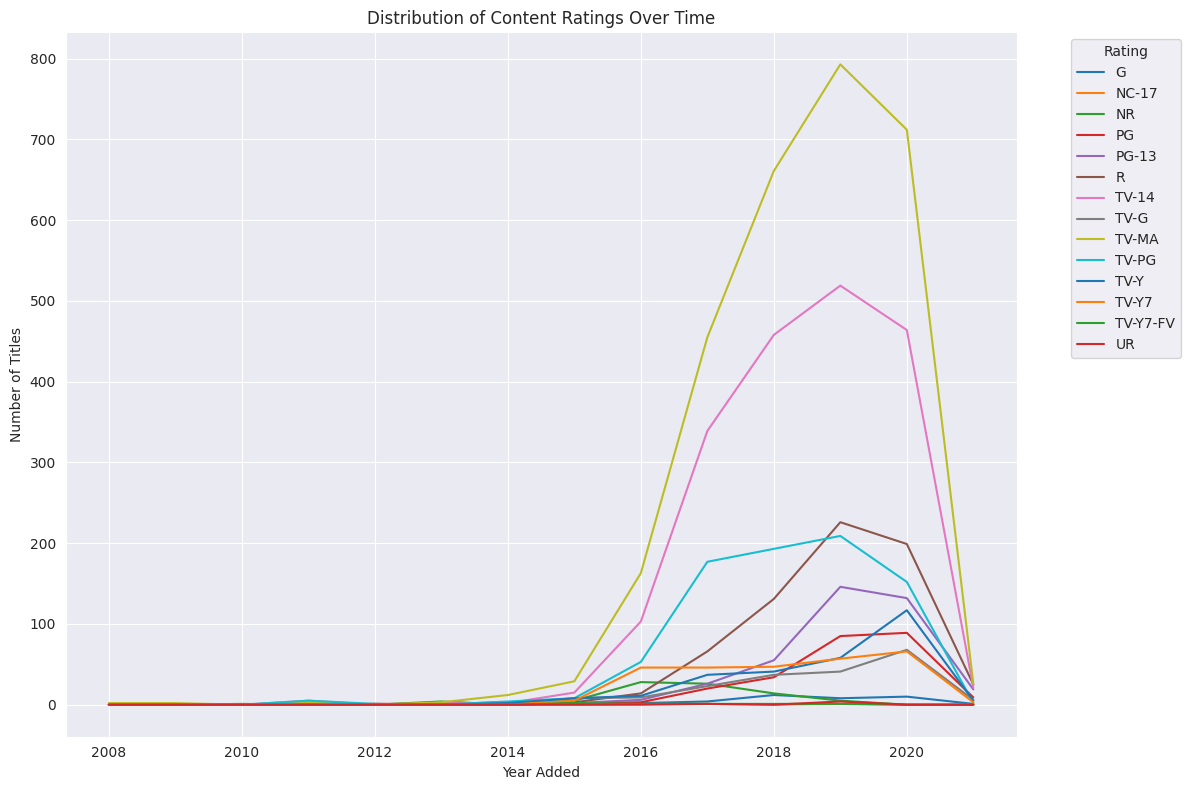

In [ ]:
plt.figure(figsize=(12, 8))
rating_over_time.plot(kind='line', ax=plt.gca())
plt.title('Distribution of Content Ratings Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:** Based on the plot, it appears that the number of titles added to Netflix across most content ratings significantly increased from around 2015 to 2019, with TV-MA and TV-14 ratings showing the most prominent growth during this period before a sharp decline in 2020 and 2021.

#### 2. Is there a relationship between content age and its type (Movie vs. TV Show)?

In [ ]:
current_year = pd.to_datetime('today').year
netflix_df['content_age'] = current_year - netflix_df['release_year']

age_type_relationship = netflix_df.groupby('type')['content_age'].describe()
display(age_type_relationship)

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Movie,5372.0,12.081720,9.667293,4.0,7.0,9.0,13.0,83.0
TV Show,2398.0,8.786072,5.660587,4.0,6.0,7.0,10.0,100.0


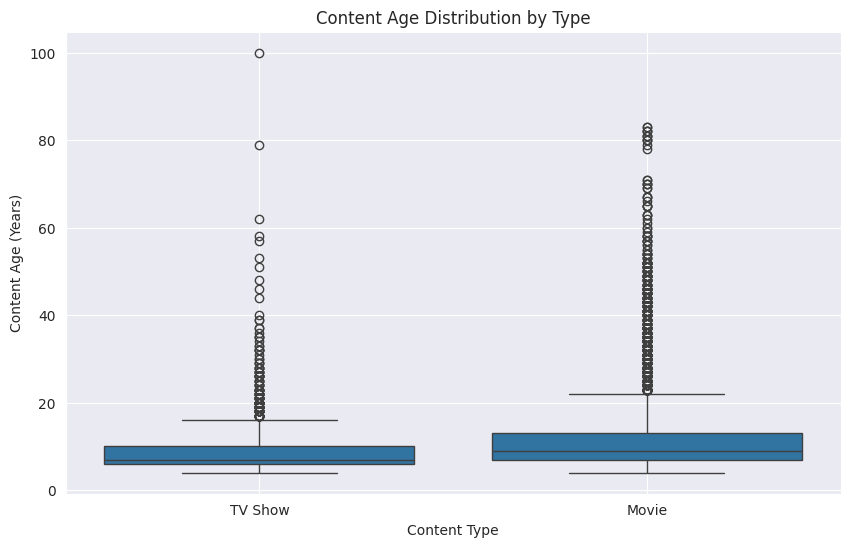

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='content_age', data=netflix_df)
plt.title('Content Age Distribution by Type')
plt.xlabel('Content Type')
plt.ylabel('Content Age (Years)')
plt.grid(True)
plt.show()

**Insight:** Based on the box plot, it appears that movies on Netflix tend to have a slightly higher median age and a wider distribution of ages compared to TV shows. This suggests that while both types of content include a range of ages, there are more older movies available on the platform than older TV shows.

#### 3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

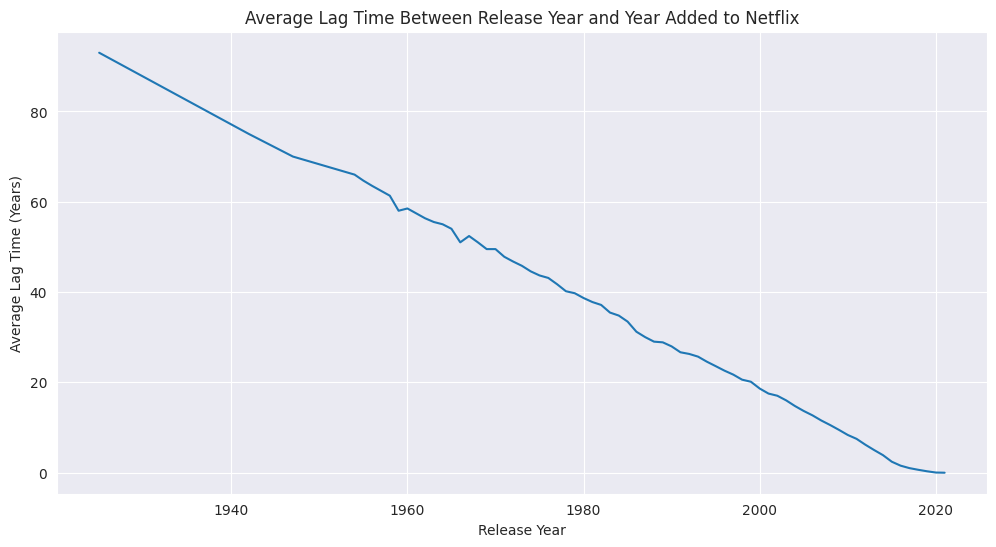

In [ ]:
# Calculating the difference between year added and release year
netflix_df['lag_time'] = netflix_df['year_added'] - netflix_df['release_year']

# Analyzing the relationship between release year and lag time
release_year_lag = netflix_df.groupby('release_year')['lag_time'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='lag_time', data=release_year_lag)
plt.title('Average Lag Time Between Release Year and Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Average Lag Time (Years)')
plt.grid(True)
plt.show()

**Insight:** Based on the plot, there's a clear downward trend in the average lag time between the release year and when content is added to Netflix. This indicates that in recent years, content is being added to Netflix much sooner after its initial release compared to older content. This is also due to Netflix being launched in 1998 and not in 1920s.

#### 4. What are the most common word pairs or phrases in content descriptions?

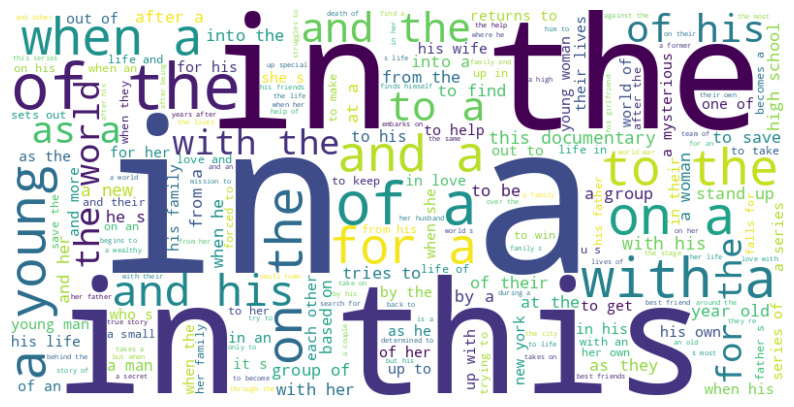

In [ ]:
from collections import Counter
import re

all_descriptions = ' '.join(netflix_df['description'].dropna()).lower()

words = re.findall(r'\b\w+\b', all_descriptions)

bigrams = [(words[i], words[i+1]) for i in range(len(words) - 1)]
bigram_counts = Counter(bigrams)
bigram_strings = {" ".join(bigram): count for bigram, count in bigram_counts.items()}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_strings)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Insight:** Based on the word cloud, it appears that common word pairs in Netflix content descriptions often involve prepositions and articles like "in this", "in a", "in the", "for a" and "on a".

#### 5. Who are the top directors on Netflix?

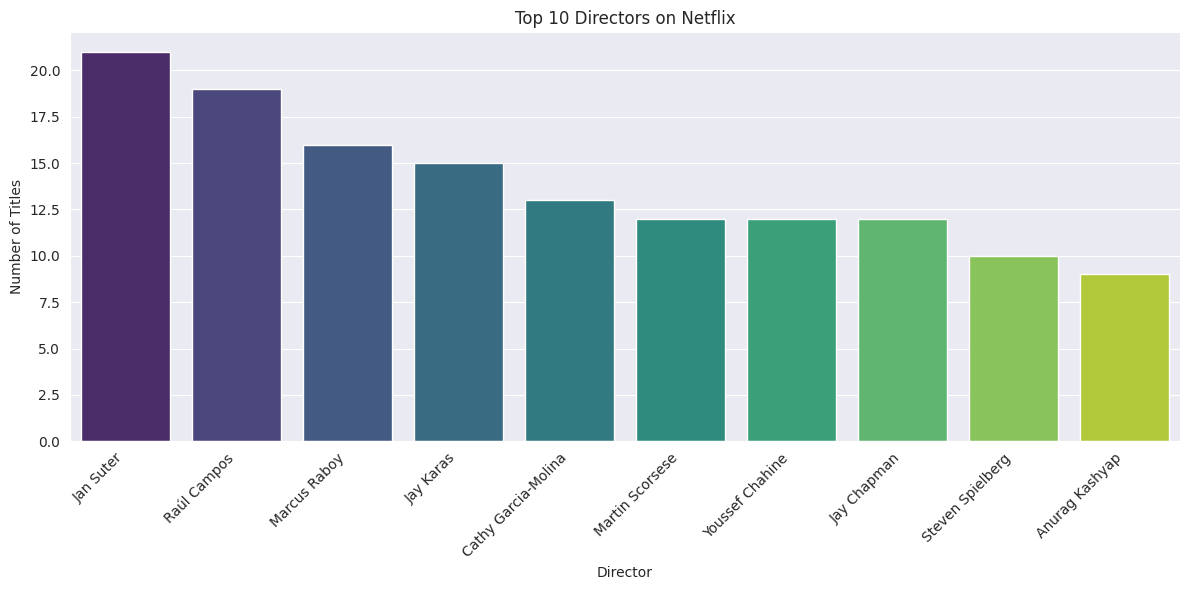

In [ ]:
directors_df = netflix_df.copy()
directors_df = directors_df[directors_df['director'] != 'Unknown']
directors_df['director'] = directors_df['director'].str.split(', ')
directors_df = directors_df.explode('director')
director_counts = directors_df['director'].value_counts()

top_directors = director_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis', hue=top_directors.index, legend=False)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:** Based on the bar graph, it appears that Jan Suter and Raúl Campos are the top directors on Netflix among the top 10, with a notably higher number of titles compared to the others. The number of titles directed by the top directors gradually decreases, indicating a clear hierarchy in terms of the volume of content contributed by these individuals to the platform.